In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [5]:
original=pd.read_csv("/content/creditcard.csv")
df=original.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

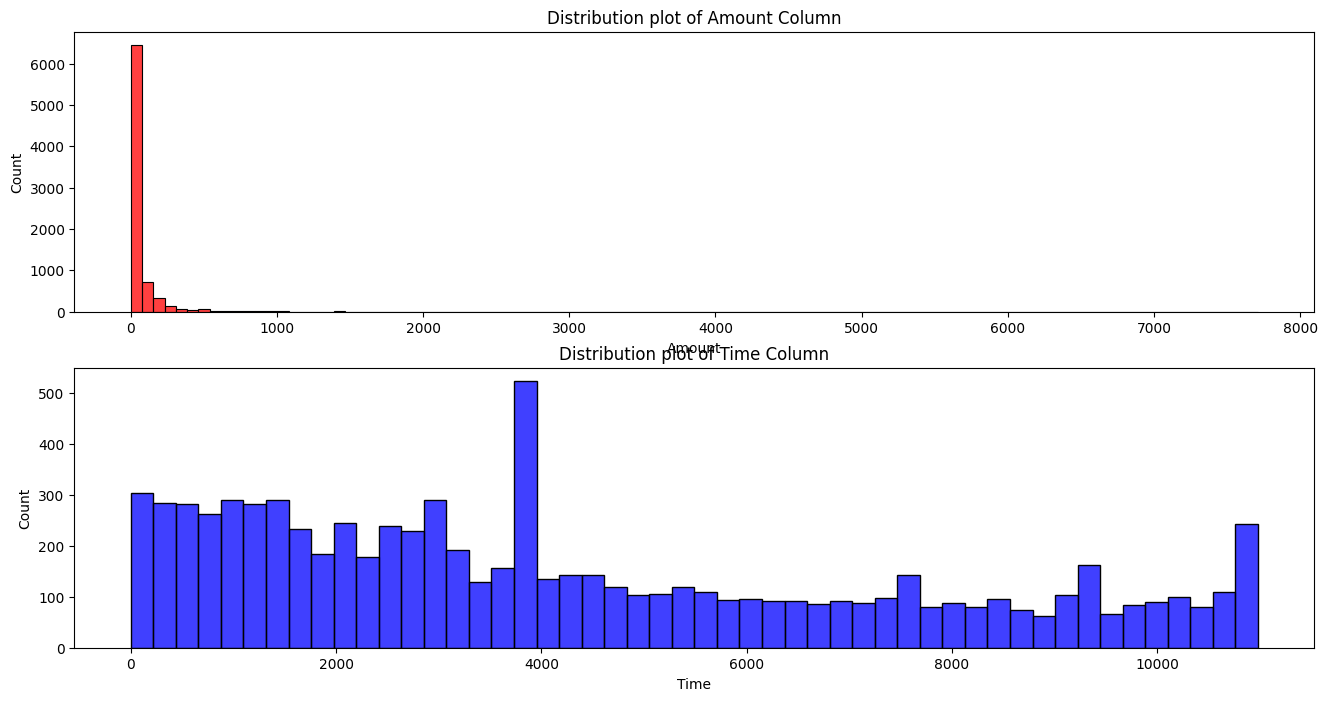

In [ ]:
#Draw distribution plot for Time and Amount
fig, ax=plt.subplots(2,1, figsize=(16,8))
sns.histplot(df.Amount,bins=100, color='r', ax=ax[0]);
ax[0].set_title("Distribution plot of Amount Column")
sns.histplot(df.Time,bins=50, color='b',ax=ax[1]);
ax[1].set_title("Distribution plot of Time Column");

In [ ]:
max(df.Time) # this is equivalent to 2 days almost so try to convert out time into hrs(total time period is 48 hrs)

3.0502777777777776

In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,...,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,...,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,...,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,...,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0
7972,10981,1.145381,-0.059349,0.968088,0.267891,-0.822582,-0.597727,-0.450197,-0.119747,1.338188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Handling missing values
df.isna().sum() #Check if any values are missing--maybe there is a correlation with mssing values and fradulent activities

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

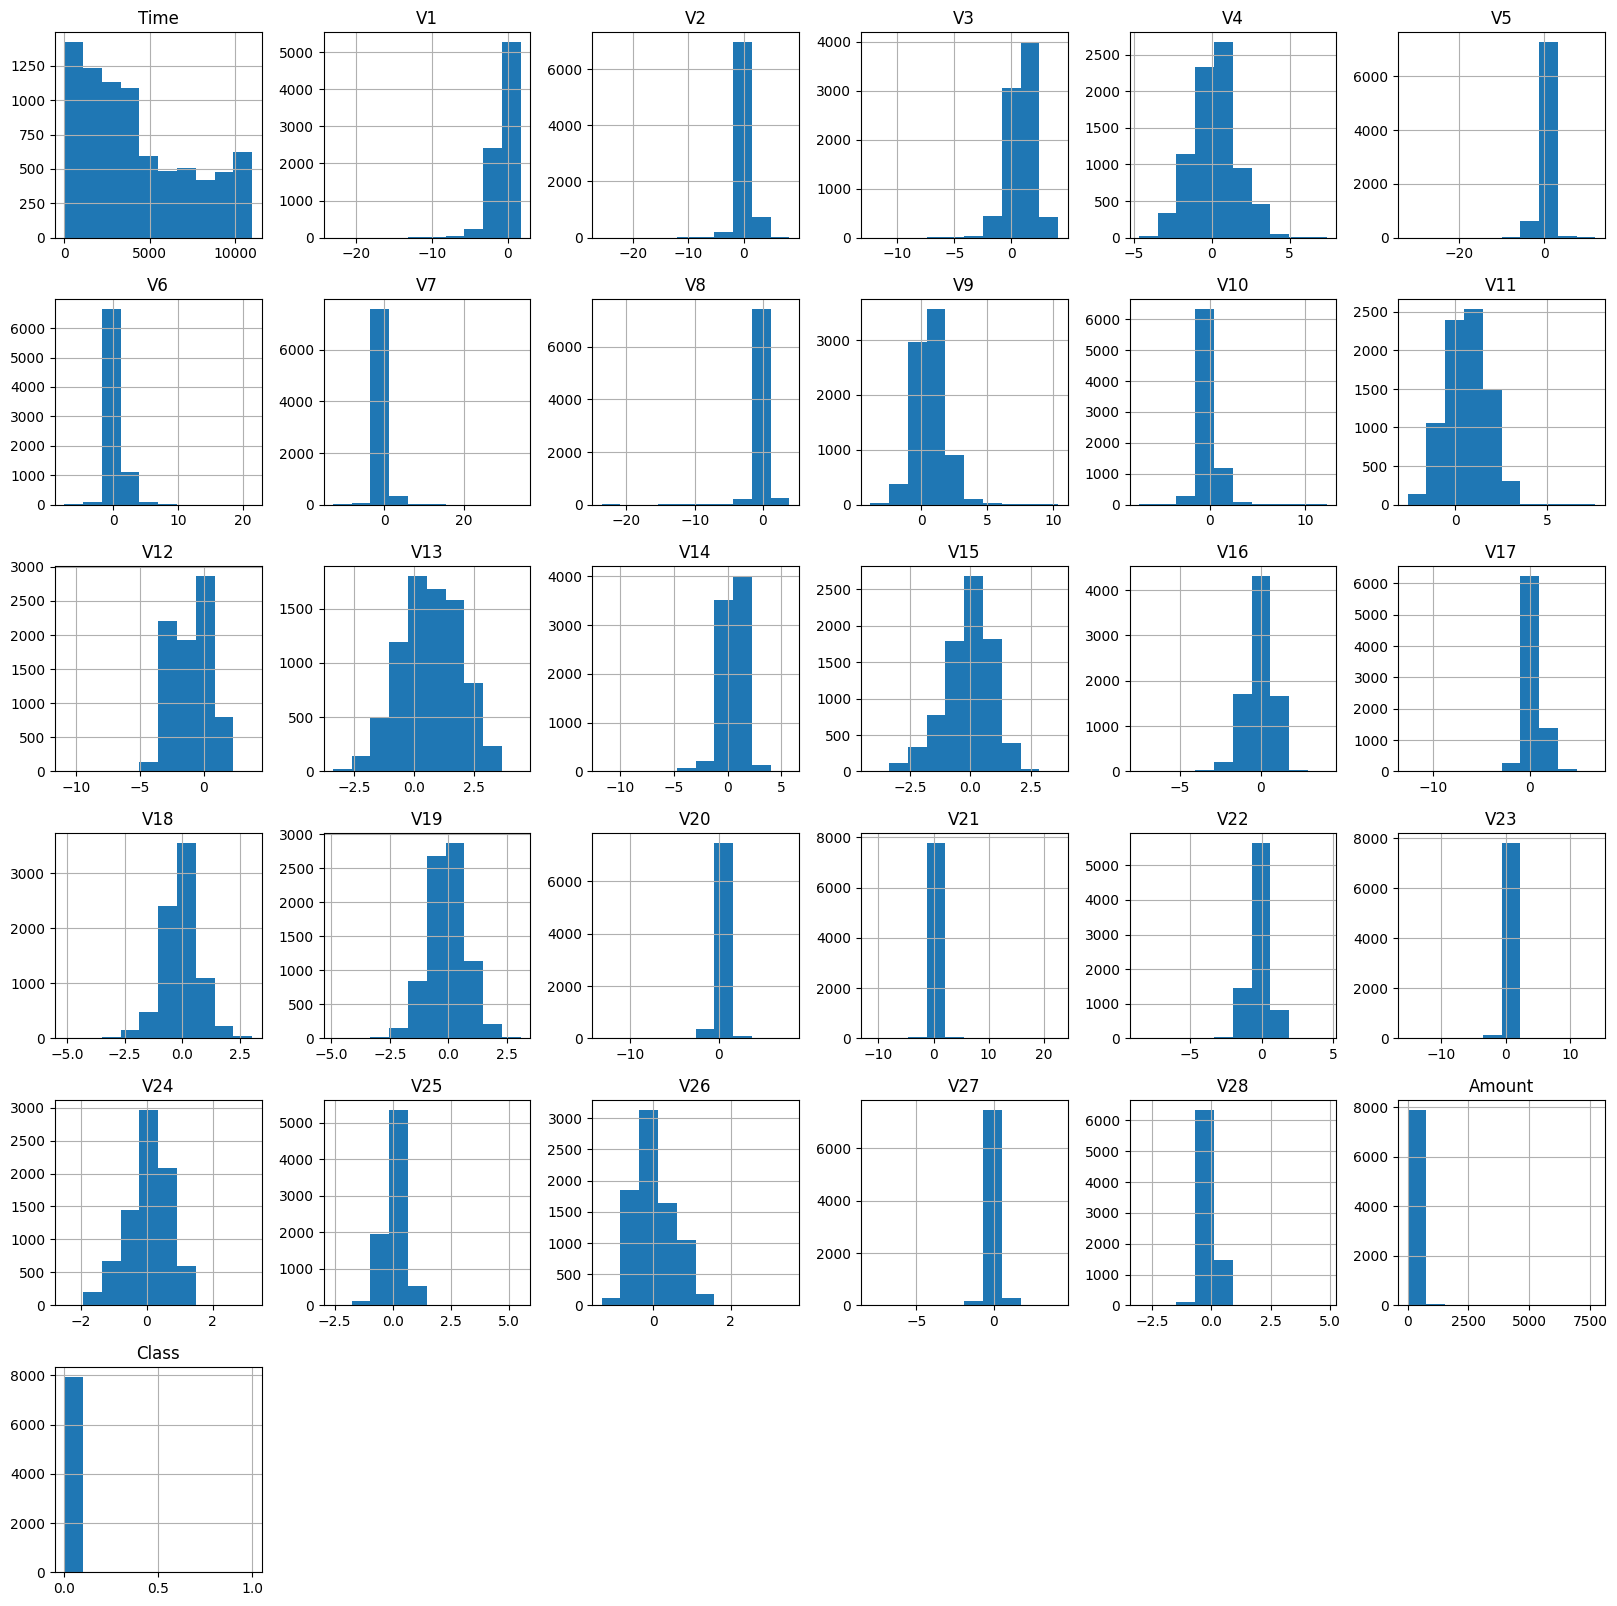

In [ ]:
df.hist(figsize = (20, 20))
plt.show()

In [7]:
df["Class"].value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

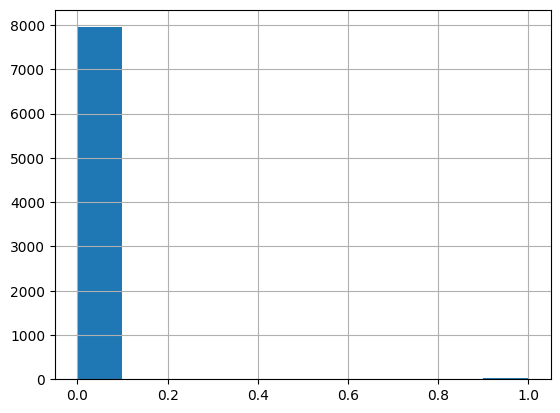

In [ ]:
df['Class'].hist()
plt.show()

In [ ]:
#Data distribution Analysis
df["Class"].value_counts()

0.0    7947
1.0      25
Name: Class, dtype: int64

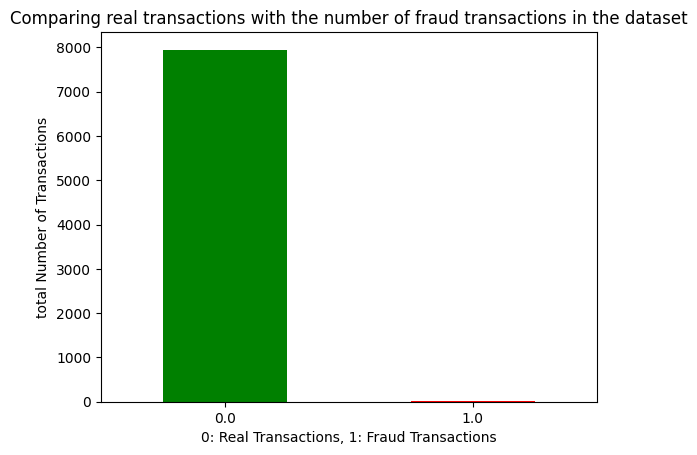

In [ ]:
#Lets visualize this
df.Class.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("total Number of Transactions")
plt.title("Comparing real transactions with the number of fraud transactions in the dataset")
plt.xticks(rotation=0);

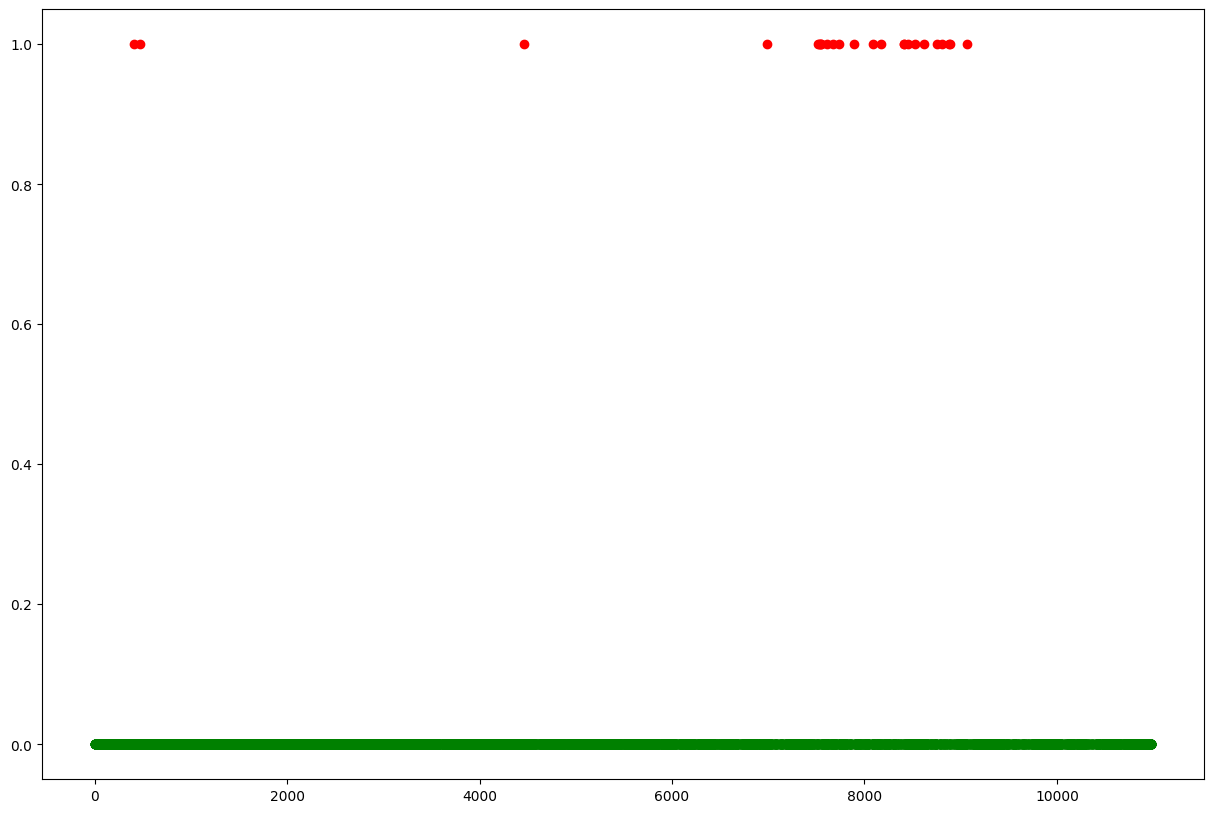

In [ ]:
#See if the transactions occur at a given time period
plt.figure(figsize=(15,10))
plt.scatter(df.Time[df.Class==1], df.Class[df.Class==1], c="red")
plt.scatter(df.Time[df.Class==0], df.Class[df.Class==0], c="green");

In [ ]:
max(df.Amount[df.Class==1]), min(df.Amount[df.Class==0])

(1809.68, 0.0)

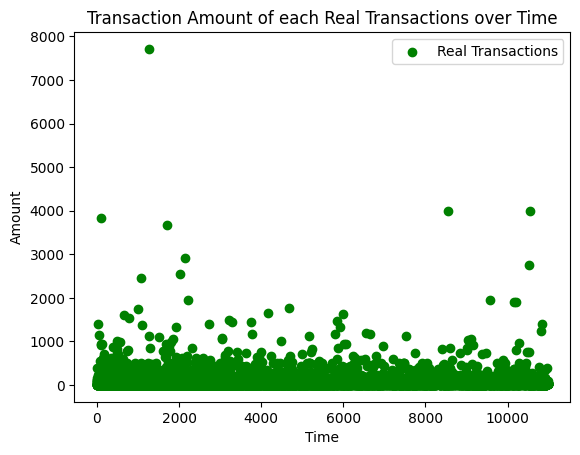

In [ ]:
#plt.figure(figsize=(10,6))
plt.scatter(df.Time[df.Class==0],df.Amount[df.Class==0], color=["green"])

plt.title("Transaction Amount of each Real Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Real Transactions"]);

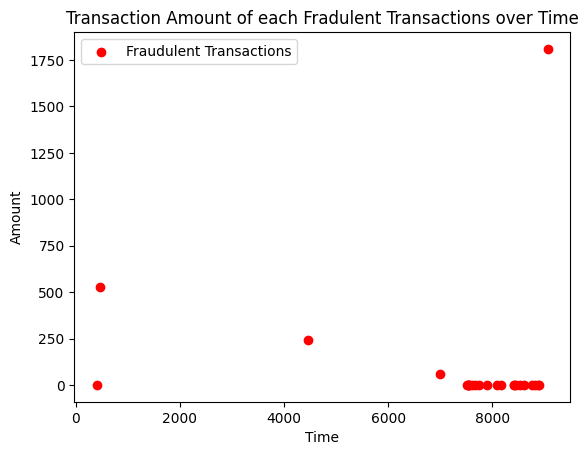

In [ ]:
plt.scatter(df.Time[df.Class==1],df.Amount[df.Class==1], color=["red"])

plt.title("Transaction Amount of each Fradulent Transactions over Time")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.legend(["Fraudulent Transactions"]);

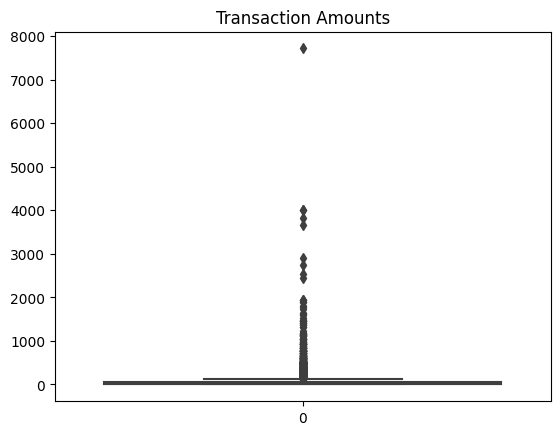

In [ ]:
#plt.figure(figsize=(10,5))
sns.boxplot(df["Amount"])
plt.title("Transaction Amounts");

In [ ]:
df.Amount.skew()

14.822946924296815

In [ ]:
#Lets look at the Mean and Standard Deviations for V1-V28 feature
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


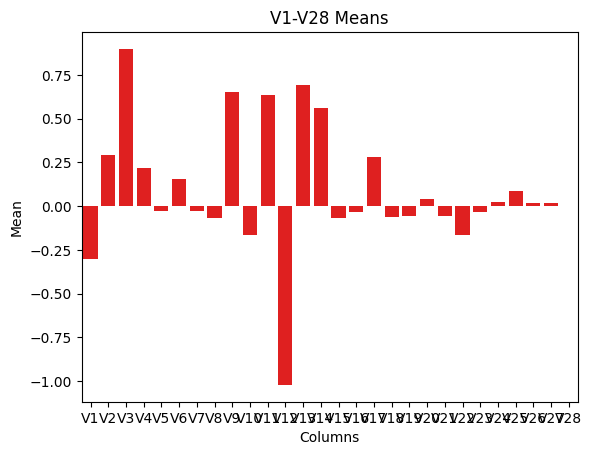

In [ ]:
vs = df.drop(labels=["Time", "Amount","Class"], axis=1)

#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.mean(), color="red")
plt.xlabel("Columns")
plt.ylabel("Mean")
plt.title("V1-V28 Means");

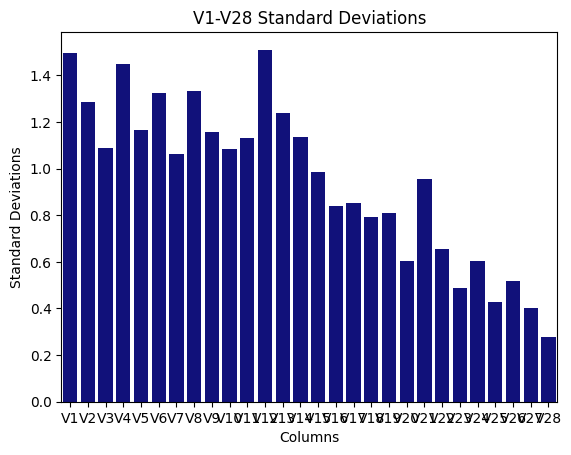

In [ ]:
#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.std(), color="darkblue")
plt.xlabel("Columns")
plt.ylabel("Standard Deviations")
plt.title("V1-V28 Standard Deviations");

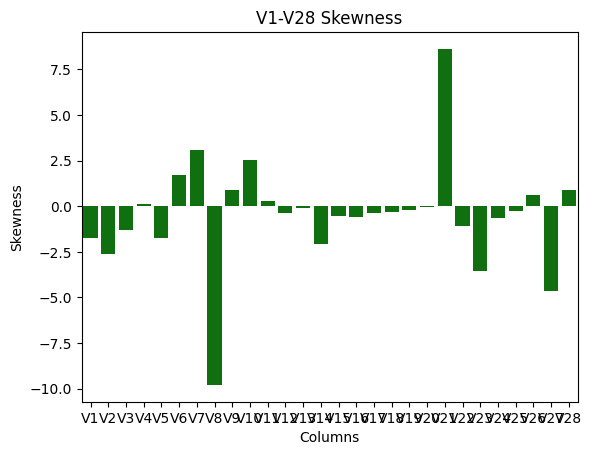

In [ ]:
#plt.figure(figsize=(10,10))
sns.barplot(x=vs.columns, y=vs.skew(), color="green")
plt.xlabel("Columns")
plt.ylabel("Skewness")
plt.title("V1-V28 Skewness");

In [ ]:
vs.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [ ]:
# separating data for further analysis
valid = df[df.Class == 0]
fraud = df[df.Class == 1]
print(valid.shape)
print(fraud.shape)
# statistical measures of the data for amouunt field
valid.Amount.describe()

(7947, 31)
(25, 31)


count    7947.000000
mean       65.284891
std       194.126547
min         0.000000
25%         4.795000
50%        15.950000
75%        54.990000
max      7712.430000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count      25.000000
mean      106.308400
std       372.676883
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
#Correlation Matrix to see how each variable is related to each other and the target variable
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.1 which is incompatible.


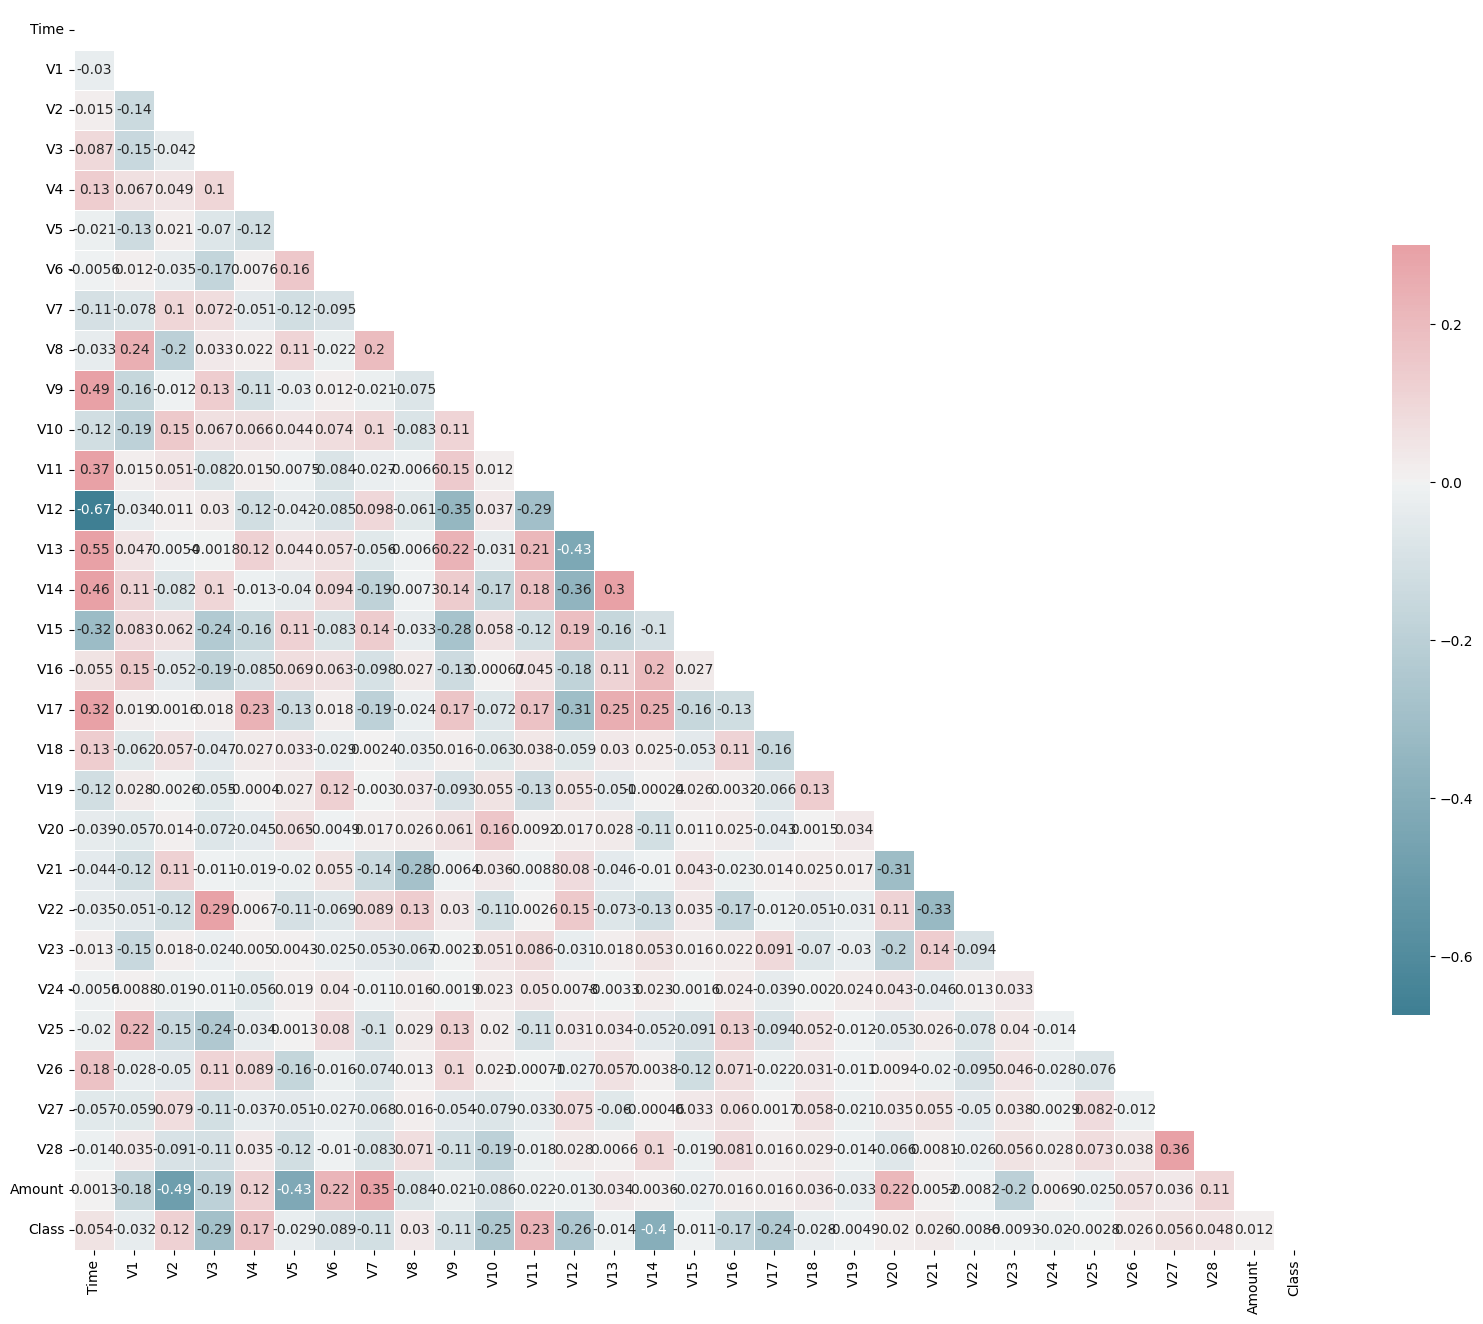

In [ ]:
corr=df.corr()

mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
X=df.drop("Class", axis=1)
y=df.Class
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5581, 30), (2392, 30), (5581,), (2392,))

In [ ]:
y_train.value_counts(), y_test.value_counts()

(0.0    5558
 1.0      23
 Name: Class, dtype: int64,
 0.0    2389
 1.0       2
 Name: Class, dtype: int64)

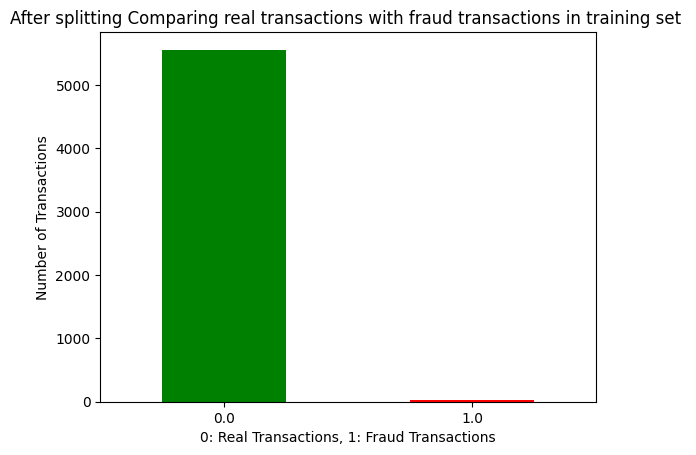

In [ ]:
y_train.value_counts().plot(kind="bar", color=["Green", "Red"])
plt.xlabel("0: Real Transactions, 1: Fraud Transactions")
plt.ylabel("Number of Transactions")
plt.title("After splitting Comparing real transactions with fraud transactions in training set ")
plt.xticks(rotation=0);

In [ ]:
#StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_train.shape, X_test.shape

((5581, 30), (2392, 30))

In [ ]:
X_train[0]

array([ 0.03426429, -0.52864355,  0.91571848, -0.08327738, -1.06792105,
        0.08520831, -0.82924977,  0.60577332, -0.07266973,  1.11530619,
        0.19078799, -0.53615501, -1.18711057,  0.57847063,  0.58394903,
       -0.16161553,  0.70057966, -0.44777256,  0.04816532, -0.89570738,
        0.50084187, -0.29429321, -0.54923508, -0.12197175, -0.33662609,
       -0.27901418,  1.43085847,  0.80563717,  0.92271621, -0.37244149])

In [ ]:
#RobustScaler
rs=RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.transform(X_test)
X_train.shape, X_test.shape

((5581, 30), (2392, 30))

In [ ]:
#OverSampling to fix the imbalanced dataset
#RandomOverSamples
X_train, y_train

(array([[ 0.14560863, -0.31170975,  0.94337726, ...,  1.56911679,
          2.35612479, -0.2875    ],
        [ 1.34264253, -0.10073983,  0.39924898, ...,  0.44390639,
         -0.81918153, -0.21746032],
        [-0.61979969, -0.06797753, -0.34015704, ..., -1.49893549,
         -4.30850099,  0.67559524],
        ...,
        [-0.57877504, -0.19164297,  0.21956916, ...,  0.75459319,
          2.56773806, -0.12003968],
        [ 1.32107088, -0.84965038, -0.92458439, ...,  1.16334464,
         -0.2450339 , -0.29761905],
        [ 1.15832049, -0.55212189,  0.97170517, ..., -5.34403156,
          0.97562655,  0.27857143]]),
 4886    0.0
 7667    0.0
 589     0.0
 3722    0.0
 5509    0.0
        ... 
 5226    0.0
 5390    0.0
 860     0.0
 7603    0.0
 7270    0.0
 Name: Class, Length: 5581, dtype: float64)

Text(0.5, 1.0, 'Count of "Class" feature in training set after ')

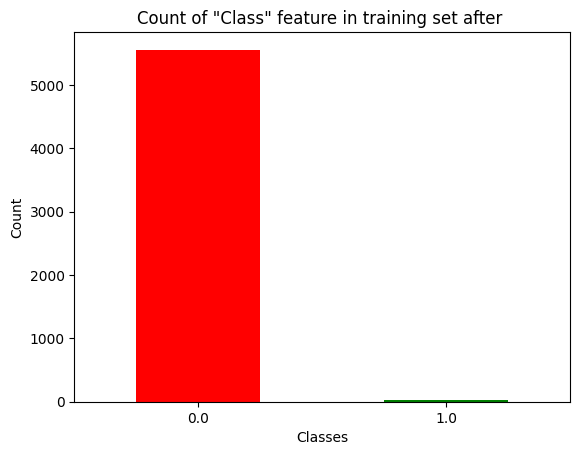

In [ ]:
#Making sure is actually correctly balancing the dataset out
lol=pd.DataFrame(data=y_train, columns=["Class"])
lol.Class.value_counts().plot.bar(color=["Red", "Green"]);
plt.xlabel("Classes")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.title("Count of \"Class\" feature in training set after ")